#### The Goal of this project is to perform exploratory data analysis (EDA) to understand the data and prepare for creating machine learning models that can predict the cost of future customers. Here I study the data and create visualization of the multiple features that in the data set. The visulizations include correlation and covariance matrices as well as individual feature distribution and charts  that depict how different features plot against the known cutomer charges.  The data set is composed of 1,338 incidences and 7 features. Each incidence is a patient; the 7 features are age, bmi, sex, number of children/dependents,smoker, region, & charges. The feature charges here stands for the cost of the customer to the insurance company.

In [1]:
# import libraries

import pandas as pd
from pandas import Series, DataFrame
# import matplotlib.pyplot for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)


In [2]:
# import the data set
ins = pd.read_csv('insurance.csv', header=0)

In [3]:
# Look at data set short description

print("insurance Dataset = {} row and {} columns\n".format(
    ins.shape[0], ins.shape [1]))

quantitative = [f for f in ins.columns if ins.dtypes[f] != 'object']
qualitative   = [f for f in ins.columns if ins.dtypes[f]  == 'object']

print("Quantitative Variables: (Numerics)\n=>", quantitative,
      "\n\nQualitative Variables: (Strings)", "\n=>", qualitative,)
      
ins.head()

insurance Dataset = 1338 row and 7 columns

Quantitative Variables: (Numerics)
=> ['age', 'bmi', 'children', 'charges'] 

Qualitative Variables: (Strings) 
=> ['sex', 'smoker', 'region']


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Look for missing data:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Exploratory Data Analysis:

In [5]:
# Looking at Correlation using basic correlation matrix using pandas:
corrMat = ins.corr()
print(corrMat)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


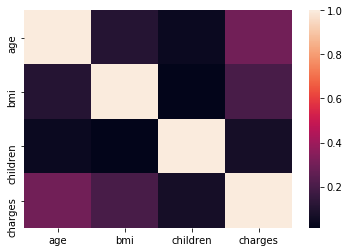

In [6]:
# Correlation Heat map
sns.heatmap(corrMat)

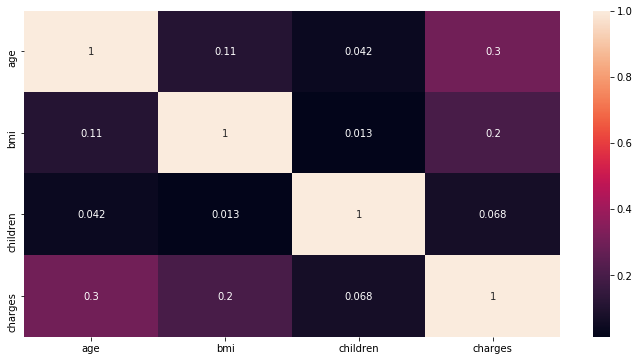

In [7]:
# Correlation heat map
plt.figure(figsize = (12,6))
sns.heatmap(corrMat, annot = True,)

In [8]:
# using covariance to study how changes in one varialbe are associated with changes in a 
# second variable.
# Calculating covariance
covMat = ins.cov()
print (covMat)

                   age           bmi    children       charges
age         197.401387      9.362337    0.719303  5.087480e+04
bmi           9.362337     37.187884    0.093795  1.464730e+04
children      0.719303      0.093795    1.453213  9.926742e+02
charges   50874.802298  14647.304426  992.674197  1.466524e+08


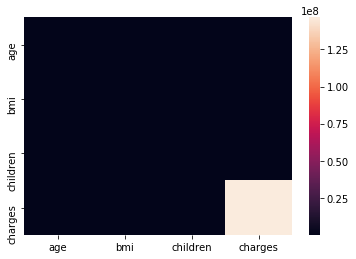

In [9]:
# Covariance heat map
sns.heatmap(covMat)

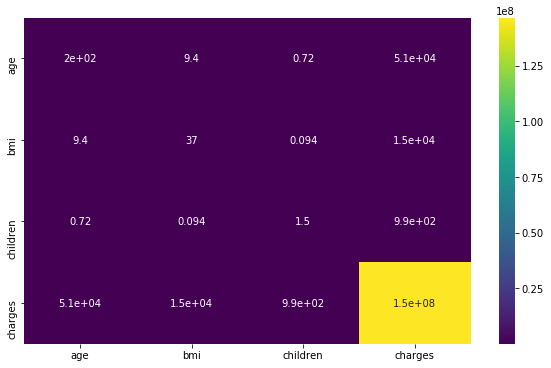

In [10]:
# covariance heat map2
plt.figure(figsize = (10,6))
sns.heatmap(covMat, annot = True, cmap = 'viridis')

In [11]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
# obtain descriptive statistics for features with numeric values:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Charges

In [13]:
# look at the amount of charges of our customers
print('Average and median customer charges are %0.f and %0.f dollars, respectively.'%(ins.charges.mean(),ins.charges.median()))


Average and median customer charges are 13270 and 9382 dollars, respectively.


In [14]:
ins.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

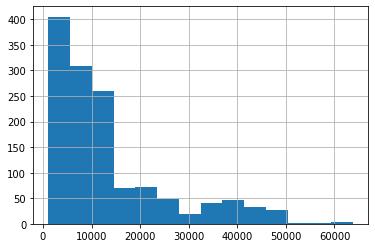

In [15]:
# look at customer charges  by histogram
ins['charges'].hist(bins=14)

#### Figure 1: Distribution of customer charges range is from 1,112.00 to 63,770 dollars.

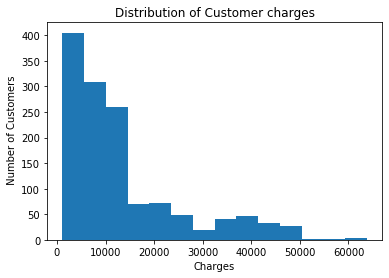

In [16]:
# plot the distribution of charges using matplotlib.pyplot
plt.hist(ins['charges'],bins=14)
plt.title("Distribution of Customer charges")
plt.xlabel("Charges")
plt.ylabel(" Number of Customers")
plt.show()

#### Figure 2: Distribution of customer charges range is from 1,112.00 to 63,770 dollars

Text(0.5, 1.0, "Distrubution of Customers' Charges")

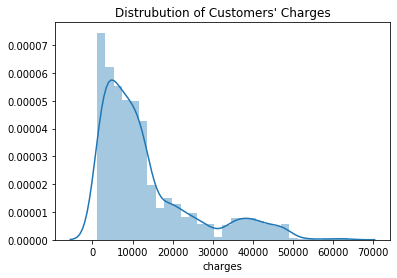

In [17]:
# Distribution charges, with an overlay of a desity plot
charges_dist = sns.distplot(ins.charges)
charges_dist.set_title("Distrubution of Customers' Charges")

#### Figure 3: Distribution of customer charges with density plot overlay. The density plot shows that the highest density of the customer charges fall between  1100 & 1500 dollars.

In [18]:
#create a function to define patient charges (< 18, > 18 but <  25, >25 but < 30, > 30 but < 40,  and >40.)
def Low_MedLow_Medium_MedHigh_High(cost):
    charges = cost
    if charges < 10000 :return 'Low'
    if 10000 < charges < 20000:return 'MedLow'
    if 20000 < charges < 30000: return 'Medium'
    if 30000 < charges < 40000: return 'MedHigh'
    if charges > 40000 :return 'High'

In [19]:
# add a column to ins describing 'charges_scale'
ins['Charges_scale']=ins['charges'].apply(Low_MedLow_Medium_MedHigh_High)

In [20]:
ins.head()

,age,sex,bmi,children,smoker,region,charges,Charges_scale
0,19,female,27.900,0,yes,southwest,16884.92400,MedLow
1,18,male,33.770,1,no,southeast,1725.55230,Low
2,28,male,33.000,3,no,southeast,4449.46200,Low
3,33,male,22.705,0,no,northwest,21984.47061,Medium
4,32,male,28.880,0,no,northwest,3866.85520,Low


In [21]:
# Number of customers in each charges_scale class
ins.groupby('Charges_scale')['Charges_scale'].count()

Charges_scale
High        79
Low        712
MedHigh     83
MedLow     353
Medium     111
Name: Charges_scale, dtype: int64

Text(0.5, 1, 'Customer By Charges level')

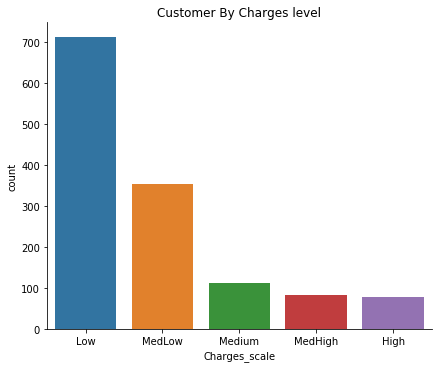

In [22]:
#create catplot for customers split into the charges_scale
sns.catplot('Charges_scale',data = ins, kind='count', order=['Low','MedLow', 'Medium', 'MedHigh', 'High'], aspect = 1.2)
plt.title('Customer By Charges level')

#### Age

In [23]:
print(' The average and median customer age is %0.f and %0.f years old, respectively.'%(ins.age.mean(),ins.age.median()))

 The average and median customer age is 39 and 39 years old, respectively.


In [24]:
# obtain basic statistic for customer age
ins.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

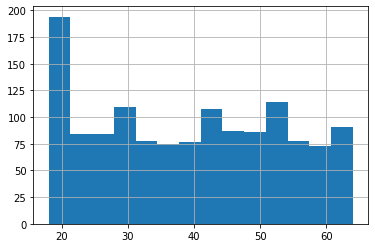

In [25]:
# look at customer age  by histogram in this case I created 14 bins 
# of approximatly 5 years each.
ins['age'].hist(bins=14)

#### Figure 4: Distribution of customer age range is from 18 to 64 years of age.

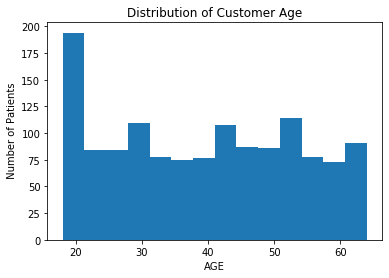

In [26]:
# plot the distribution of age using matplotlib.pyplot
plt.hist(ins['age'],bins=14)
plt.title("Distribution of Customer Age")
plt.xlabel("AGE")
plt.ylabel(" Number of Patients")
plt.show()

#### Figure 4: Distribution of customer age range is from 18 to 64 years of age.


Text(0.5, 1.0, "Distrubution of Customers' Age")

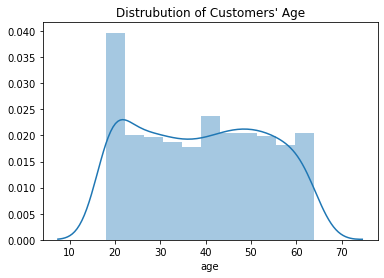

In [27]:
# Distribution age, with an overlay of a desity plot
age_dist = sns.distplot(ins.age)
age_dist.set_title("Distrubution of Customers' Age")

#### Figure 5:  Distribution of customers age with a density plot overlay. The plot indicates that the majority of the customers are with in the age range of about 25 to 60 years old. however, a distinck peak exists between ages 18 and 25.

In [28]:
#create a function to define customers by age group (< 35, > 35 but <  50, & >50.)
def middle_older_young(customer):
    age = customer
    if age < 35 :return 'young'
    if 35 < age < 50 :return 'middle'
    if age > 50 : return 'older'

In [29]:
# add a column to ins describing 'Age Groups'
ins['Age_Group']=ins['age'].apply(middle_older_young)

In [30]:
# confirm that the column has been added
ins.head()

,age,sex,bmi,children,smoker,region,charges,Charges_scale,Age_Group
0,19,female,27.900,0,yes,southwest,16884.92400,MedLow,young
1,18,male,33.770,1,no,southeast,1725.55230,Low,young
2,28,male,33.000,3,no,southeast,4449.46200,Low,young
3,33,male,22.705,0,no,northwest,21984.47061,Medium,young
4,32,male,28.880,0,no,northwest,3866.85520,Low,young


In [31]:
#Determine the number of young, middle,and older patients
ins['Age_Group'].value_counts()

young     549
middle    379
older     356
Name: Age_Group, dtype: int64

Text(0.5, 1, 'Customer By Age Groups')

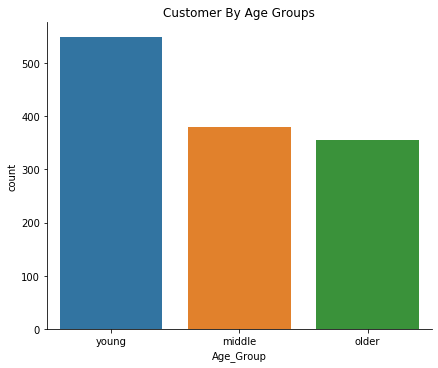

In [32]:
#create catplot for patients splitt into young,middle, older, and Diagnosis
sns.catplot('Age_Group',data = ins, kind='count', aspect = 1.2)
plt.title('Customer By Age Groups')

#### Figure 6: Distribution of Customer Age by Groups. The chart shows the pool of young custmers is larger (550) than the middle and older customer pools. While there is similar quantity of middle (379) and older customers (356) in customer pool.

#### Gender

In [33]:
# Number of customers in each geneder class
ins.groupby('sex')['sex'].count()

sex
female    662
male      676
Name: sex, dtype: int64

Text(0.5, 1, 'Customers By Gender')

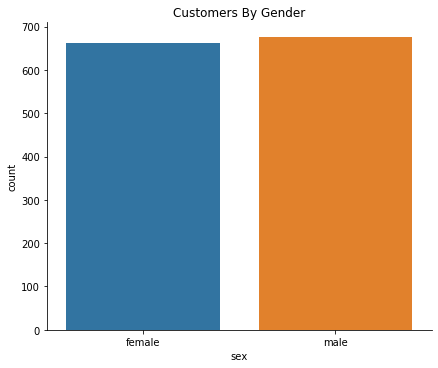

In [34]:
# Plot the number of customers in each gender
sns.catplot('sex',data = ins, kind='count', aspect = 1.2)
plt.title('Customers By Gender')

#### Figure 7: Distribution of Customer Age by Gender. The chart shows the pool of young custmers is composed of approximatly equal number of male and females.  

#### Body Mass Index (BMI)

In [35]:
# look at the amount of charges of our customers
print('The average and median customer BMI is %0.f and %0.f, respectively.'%(ins.bmi.mean(),ins.bmi.median()))


The average and median customer BMI is 31 and 30, respectively.


In [36]:
# obtain basic statistics for customer BMI
ins.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

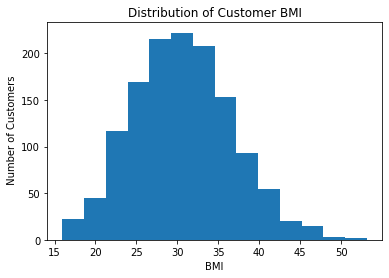

In [37]:
# plot the distribution of BMI using matplotlib.pyplot
plt.hist(ins['bmi'],bins=14)
plt.title("Distribution of Customer BMI")
plt.xlabel("BMI")
plt.ylabel(" Number of Customers")
plt.show()

#### Figure 8: Distribution of Customer BMI. The chart shows the customer BMI seperated into 14 bars between 15 and 60 BMI scores  with the a peak in the 25 to 35 BMI score.

Text(0.5, 1.0, 'Distrubution of Customer BMI')

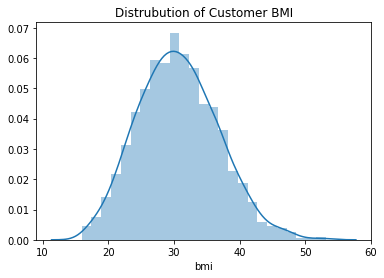

In [38]:
# Distribution BMI, with an overlay of a desity plot
BMI_dist = sns.distplot(ins.bmi)
BMI_dist.set_title("Distrubution of Customer BMI")

#### Figure 9:  Distribution of customers BMI with a density plot overlay. The plot indicates that the majority of the customers are with in the BMI range of about 25 to 35. however, a distinck peak exists around BMI of 33.¶

In [39]:
#create a function to define patients by BMI scale (< 18, > 18 but <  25, >25 but < 30, > 30 but < 40,  and >40.)
def underweight_healthy_overweight_obese_exobese(customer):
    bmi = customer
    if bmi < 18 :return 'underweight'
    if 18 < bmi < 25:return 'healthy'
    if 24 < bmi < 29: return 'overweight'
    if 29 < bmi < 39: return 'obese'
    if bmi > 39 :return 'exobese'

In [40]:
# add a column to ins describing 'BMI_scale'
ins['BMI_scale']=ins['bmi'].apply(underweight_healthy_overweight_obese_exobese)

In [41]:
ins.head()

,age,sex,bmi,children,smoker,region,charges,Charges_scale,Age_Group,BMI_scale
0,19,female,27.900,0,yes,southwest,16884.92400,MedLow,young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,Low,young,obese
2,28,male,33.000,3,no,southeast,4449.46200,Low,young,obese
3,33,male,22.705,0,no,northwest,21984.47061,Medium,young,healthy
4,32,male,28.880,0,no,northwest,3866.85520,Low,young,overweight


In [42]:
# Number of customers in each education class
ins.groupby('BMI_scale')['BMI_scale'].count()

BMI_scale
exobese        126
healthy        230
obese          652
overweight     313
underweight     15
Name: BMI_scale, dtype: int64

Text(0.5, 1, 'Customers By BMI scale')

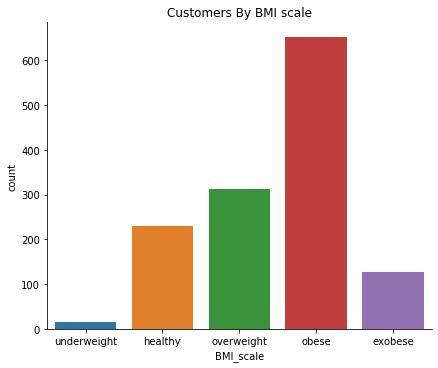

In [43]:
# Plot the number of customers in each BMI sclae category
sns.catplot('BMI_scale',data = ins, kind='count',order=['underweight','healthy','overweight','obese','exobese'], aspect = 1.2)
plt.title('Customers By BMI scale')

####  Figure 10: Distribution of Customer BMI by classfication scale. The chart shows the number of customers in each category. BMI 

#### Look at the number of children from customers

In [44]:
# look at the number of children/dependents of our customers
print('The average and median customer dependents is %0.f and %0.f, respectively.'%(ins.children.mean(),ins.children.median()))


The average and median customer dependents is 1 and 1, respectively.


In [45]:
# obtain basic statistics for customer dependents
ins.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [46]:
# Number of customers dependents
ins.groupby('children')['children'].count()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

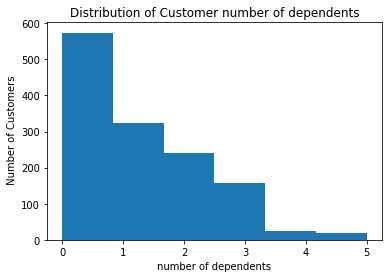

In [47]:
# plot the distribution of dependets using matplotlib.pyplot
plt.hist(ins['children'],bins=6)
plt.title("Distribution of Customer number of dependents")
plt.xlabel("number of dependents")
plt.ylabel(" Number of Customers")
plt.show()


#### Figure 11: Distribution of the customers' number of dependents. The plot show the number customers with and their dependents.

Text(0.5, 1.0, 'Distrubution of Customer Dependents')

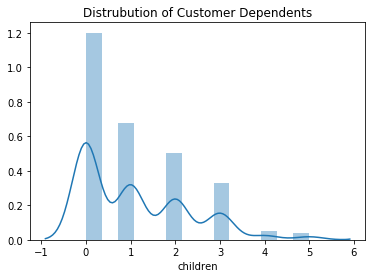

In [48]:
# Distribution customer dependents, with an overlay of a desity plot
dependent_dist = sns.distplot(ins.children)
dependent_dist.set_title("Distrubution of Customer Dependents")

Figure 12: Distribution of the customers' number of dependents with a density plot overlay. The plot show that the highest customer density correlates with 0 and 1 dependent. 

#### Determine the number of smokers in customer pool

In [49]:
# Number of customers in smoker category
ins.groupby('smoker')['smoker'].count()

smoker
no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1, 'Customers By smoking status')

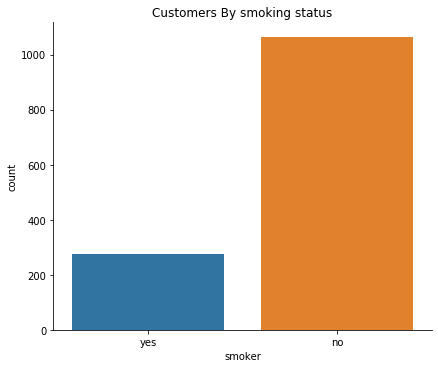

In [50]:
# Plot the number of customers in smoker category
sns.catplot('smoker',data = ins, kind='count', aspect = 1.2)
plt.title('Customers By smoking status')

Figure 13: Quantity of customers plotted by smoking or non smoking.We can see that the majority of customers are not smokers. Only about 20% of customers are smokers.

Text(0.5, 1, 'Customers By smoking status')

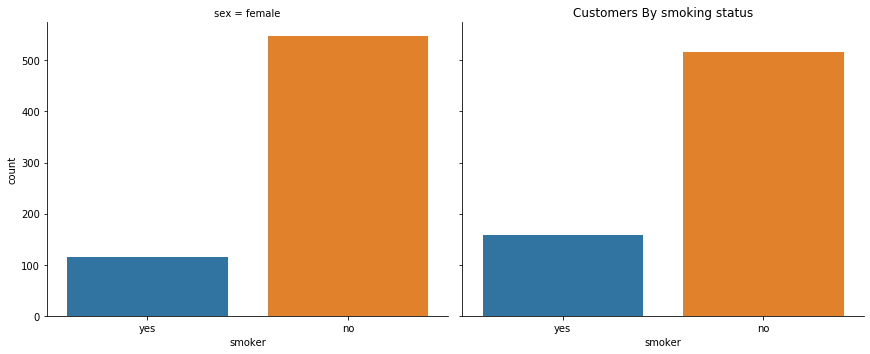

In [51]:
# Plot the number of customers in smoker category by Gender
sns.catplot('smoker',data = ins, kind='count',col='sex', aspect = 1.2)
plt.title('Customers By smoking status')

Figure 14: Quantity of customers plotted by smoking category and Gender.We can see that within the smoker population more males than females are smokers. 

#### Customer region

In [52]:
#number of customers by region
ins.groupby('region')['region'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64

Text(0.5, 1, 'Customers By Region')

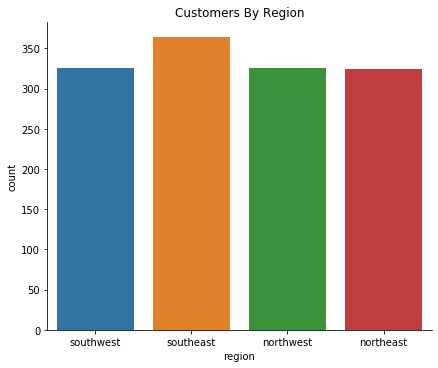

In [53]:
# Plot the number of customers in each region
sns.catplot('region',data = ins, kind='count', aspect = 1.2)
plt.title('Customers By Region')

Figure 15: Quantity of customers plotted by region. We can see that the distribution of customer is about the same for all regions. A small peak exists in the southeast.

In [54]:
# Number of customers in smoker category
ins.groupby('Age_Group')['Age_Group'].count()

Age_Group
middle    379
older     356
young     549
Name: Age_Group, dtype: int64

Text(0.5, 1, 'Customer Charges by Age Group')

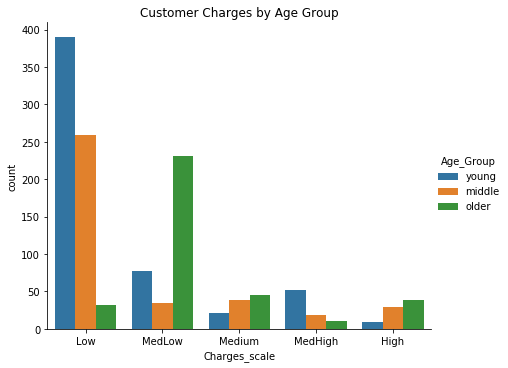

In [55]:
#catplot for customers splitt into charge scale and Age Group
sns.catplot('Charges_scale',data = ins, kind='count', order= ['Low', 'MedLow', 'Medium', 'MedHigh', 'High'], hue='Age_Group',  hue_order = ['young', 'middle','older'],aspect=1.2)
plt.title ('Customer Charges by Age Group')

Figure 16: Plot describing the customer charges among the different customer age groups. We can see that the mohority f the charges lie in the Los to Medlow range. In The Low range young customers are the posses the most charges whilde in the MedLow range the older population hold the most charges followed by the young .  Low= less than 10K, MedLow = between 10k and 20k, Medium = between 20k and 30K, MedHigh= between 30K and 40K, HIgh= more than 40K.

Text(0.5, 1, 'Customer Charges by Gender')

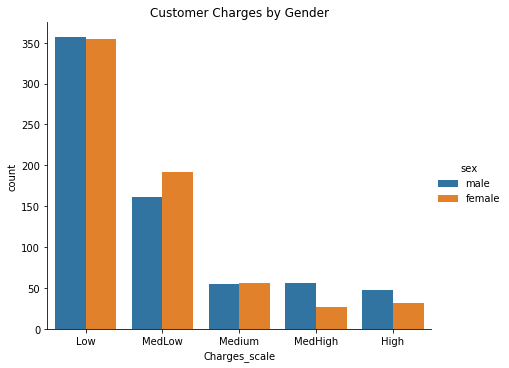

In [56]:
#catplot for customers splitt into charge scale and Gender
sns.catplot('Charges_scale',data = ins, kind='count', order= ['Low', 'MedLow', 'Medium', 'MedHigh', 'High'], hue='sex',  hue_order = ['male', 'female'],aspect=1.2)
plt.title ('Customer Charges by Gender')

Figure 17: Plot describing the customer charges among genders.  Low= less than 10K, MedLow = between 10k and 20k, Medium = between 20k and 30K, MedHigh= between 30K and 40K, HIgh= more than 40K.

Text(15.243981481481491, 0.5, 'Number of Customers')

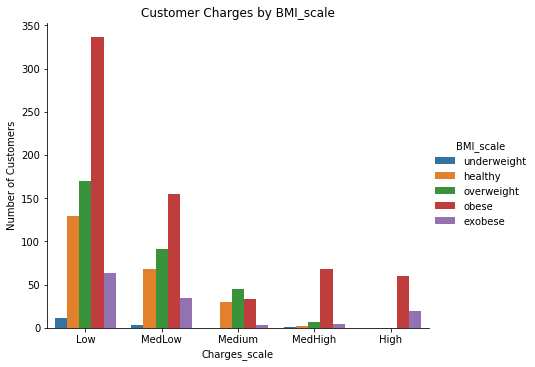

In [57]:
#catplot for customers splitt into charge scale and BMI category
sns.catplot('Charges_scale',data = ins, kind='count', order= ['Low', 'MedLow', 'Medium', 'MedHigh', 'High'], hue='BMI_scale',  hue_order = ['underweight','healthy','overweight','obese','exobese'],aspect=1.2)
plt.title ('Customer Charges by BMI_scale')
plt.ylabel('Number of Customers')

Figure 18: Plot for the customer charges as related to BMI levels. Low= less than 10K, MedLow = between 10k and 20k, Medium = between 20k and 30K, MedHigh= between 30K and 40K, HIgh= more than 40K.

Text(10.942129629629633, 0.5, 'Number of Customers')

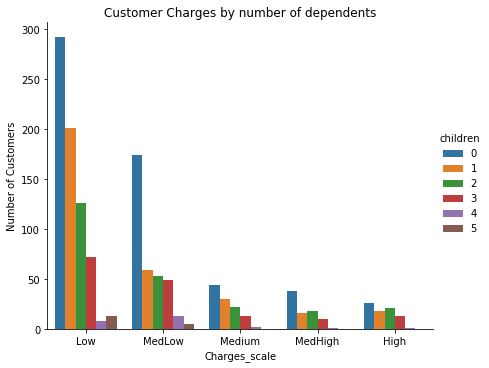

In [58]:
#catplot for customers splitt into charge scale and number of dependents
sns.catplot('Charges_scale',data = ins, kind='count', order= ['Low', 'MedLow', 'Medium', 'MedHigh', 'High'], hue='children',  hue_order = [0, 1, 2, 3, 4, 5], aspect=1.2)
plt.title ('Customer Charges by number of dependents')
plt.ylabel('Number of Customers')

Figure19: Plot for the customer charges as related to the number of dependents. Low= less than 10K, MedLow = between 10k and 20k, Medium = between 20k and 30K, MedHigh= between 30K and 40K, HIgh= more than 40K.

Text(11.320703125000009, 0.5, 'Number of Customers')

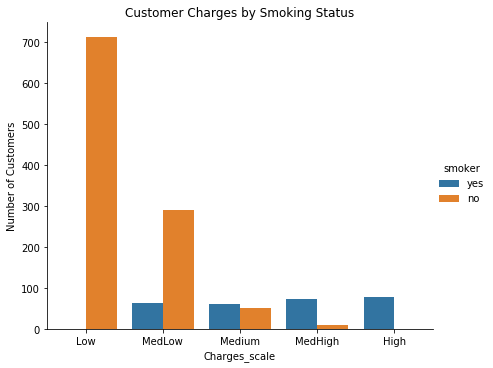

In [59]:
#catplot for customers splitt into charge scale and smoking category
sns.catplot('Charges_scale',data = ins, kind='count', order= ['Low', 'MedLow', 'Medium', 'MedHigh', 'High'], hue='smoker',  hue_order = ['yes', 'no'], aspect=1.2)
plt.title ('Customer Charges by Smoking Status')
plt.ylabel('Number of Customers')

Figure20: Plot for the customer charges as related to their smoking category. we can see that there are no smokers in the low charges category and that only smokers are found in the high charges category. Low= less than 10K, MedLow = between 10k and 20k, Medium = between 20k and 30K, MedHigh= between 30K and 40K, HIgh= more than 40K. 

Text(14.257653356481484, 0.5, 'Number of Customers')

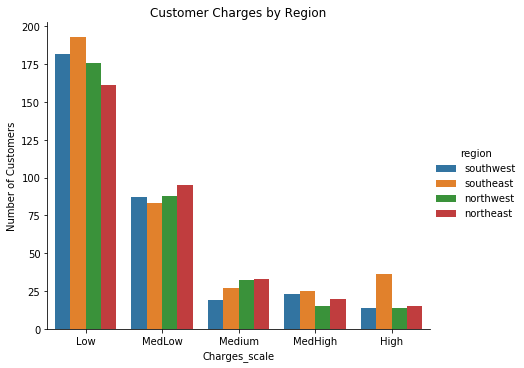

In [60]:
#catplot for customers splitt into charge scale by region
sns.catplot('Charges_scale',data = ins, kind='count', order= ['Low', 'MedLow', 'Medium', 'MedHigh', 'High'], hue='region',  hue_order = ['southwest', 'southeast', 'northwest', 'northeast'], aspect=1.2)
plt.title ('Customer Charges by Region')
plt.ylabel('Number of Customers')

Figure 21: Plot for the customer charges as related to region. we can see that the majority of the customers in each region fall with in the Low to MedLow charges category. Addtionaly the customer regions are about evenly seperated with in each charges category. Low= less than 10K, MedLow = between 10k and 20k, Medium = between 20k and 30K, MedHigh= between 30K and 40K, HIgh= more than 40K.

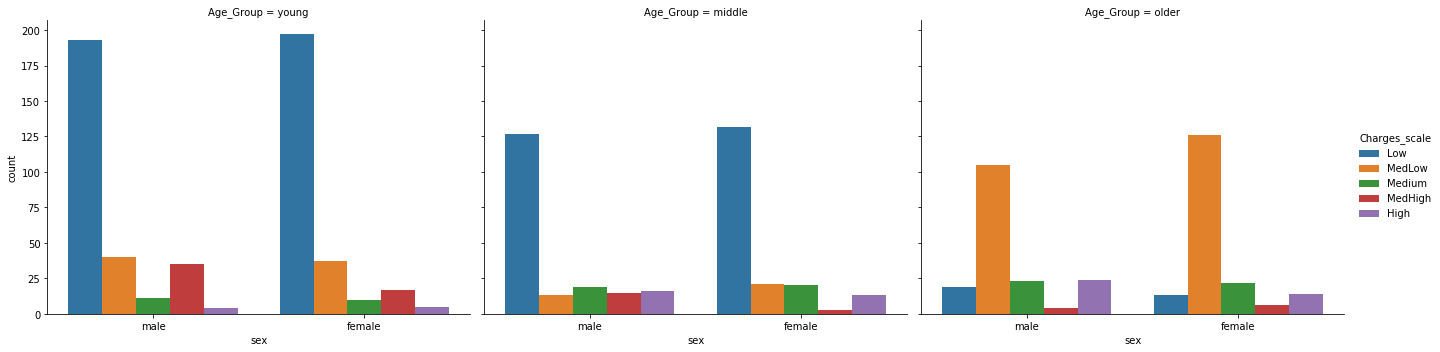

In [61]:
# split the customers by Age_Group & plot charges scale by Gender 
sns.catplot('sex', data=ins, kind='count',order= ['male', 'female'], hue = 'Charges_scale',  hue_order = ['Low', 'MedLow', 'Medium', 'MedHigh', 'High'], col='Age_Group',
              aspect=1.25, height=5)

Figure 22: Plot for the customer charges scale as related to Age Group and Gendere.  Low= less than 10K, MedLow = between 10k and 20k, Medium = between 20k and 30K, MedHigh= between 30K and 40K, HIgh= more than 40K

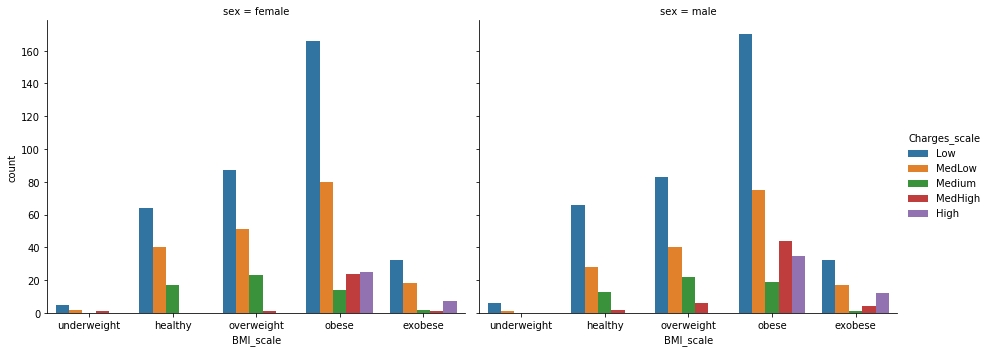

In [62]:
# split the customers by gender & plot charges by BMI_sclae 
sns.catplot('BMI_scale', data=ins, kind='count',order= ['underweight','healthy','overweight','obese','exobese'], hue = 'Charges_scale',  hue_order = ['Low', 'MedLow', 'Medium', 'MedHigh', 'High'], col='sex',
              aspect=1.25, height=5)

Figure 23: Plot for customer charges as related gender and BMI. We can see that the charges between genders are about evenly distributed. however, there are more high charges customers in the male & obese category than in females.

In [63]:
# Number of customer dependents
ins.groupby('children')['children'].count()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

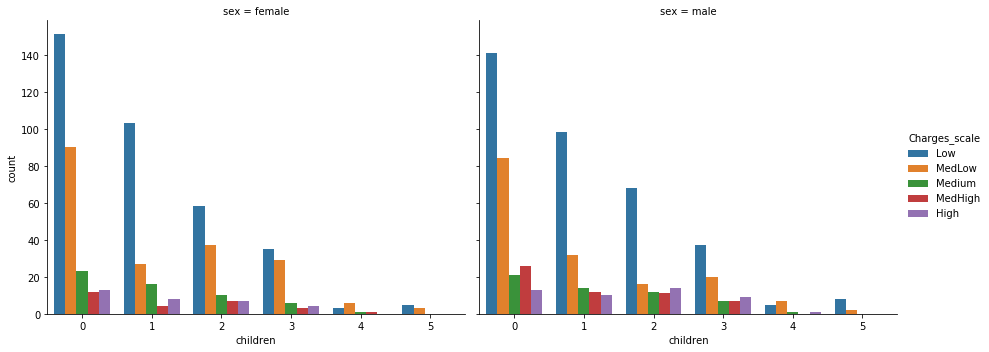

In [64]:
# split the customers by gender & plot charges by Number of dependents 
sns.catplot('children', data=ins, kind='count',order= [0,1,2,3,4,5], hue = 'Charges_scale',  hue_order = ['Low', 'MedLow', 'Medium', 'MedHigh', 'High'], col='sex',
              aspect=1.25, height=5)


Figure 24: Plot for customer charges as related to customer dependents and Gender. We can see that the charges between genders and number of dependents are about evenly distributed. Addtionally , there are far less customers with 4 or& 5 dependents than with 0, 1, 2, or 3 dependents. 

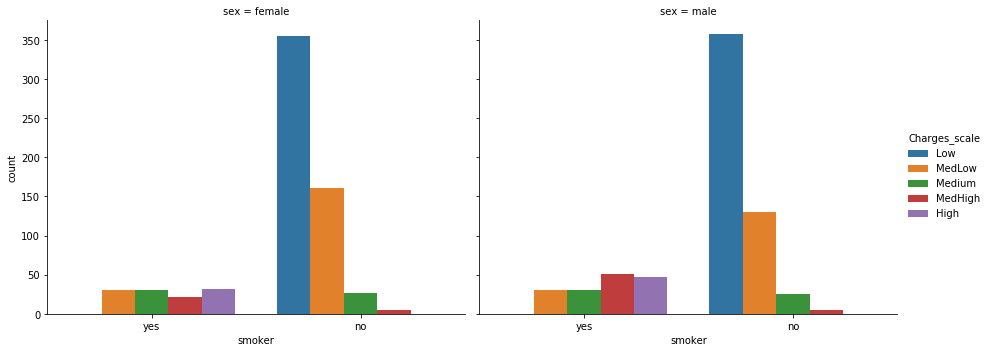

In [65]:
# split the customers by gender & plot charges by smoking status 
sns.catplot('smoker', data=ins, kind='count',order= ['yes','no'], hue = 'Charges_scale',  hue_order = ['Low', 'MedLow', 'Medium', 'MedHigh', 'High'], col='sex',
              aspect=1.25, height=5)

Figure 25: Plot for customer charges as related to customer gender and smoking category. We can see that the charges between genders and smoking categories are relatively evenly distributed. Addtionally , there are more smoker males than females and within the MedHigh and High charges categories. 

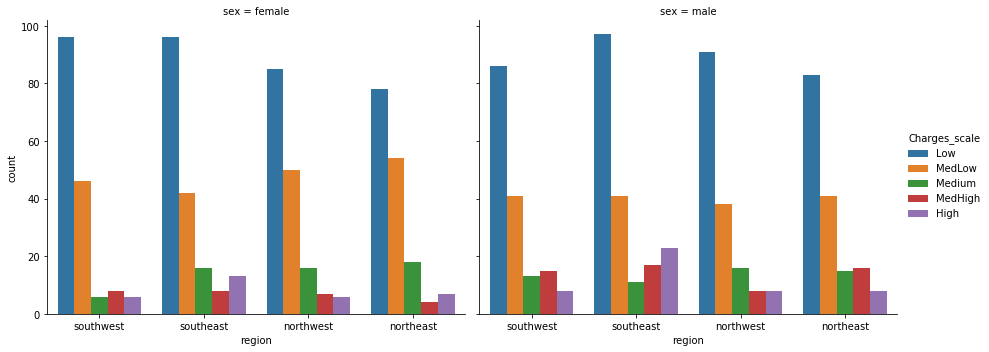

In [66]:
# split the customers by gender & plot charges by region 
sns.catplot('region', data=ins, kind='count',order= ['southwest','southeast','northwest','northeast'], hue = 'Charges_scale',  hue_order = ['Low', 'MedLow', 'Medium', 'MedHigh', 'High'], col='sex',
              aspect=1.25, height=5)

Figure 26: Plot for customer charges as related to customer gender and region. We can see that the charges between genders and regions  are relatively evenly distributed. Addtionally , there are more females than males in the MedLow charges category.

### kernel density estimate (kde) plots 

#### Distribution of customer ages by gender

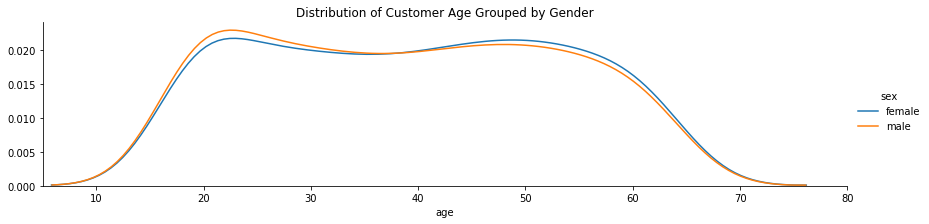

In [67]:
fig = sns.FacetGrid(ins, hue='sex', aspect=4)
fig.map(sns.kdeplot,'age', shade=False)
oldest = ins['age'].max()
fig.set(xlim=(5,80))
fig.set(title='Distribution of Customer Age Grouped by Gender')
fig.add_legend()

Figure 27: Kde plot showing the distribution of customer age by Gender. We can see that the customer density thru out the age range is evenly distributued and that it invesrly related in cutomers below 35 and over 35 yeare of age. 

#### Distribution of customer ages by BMI_scale

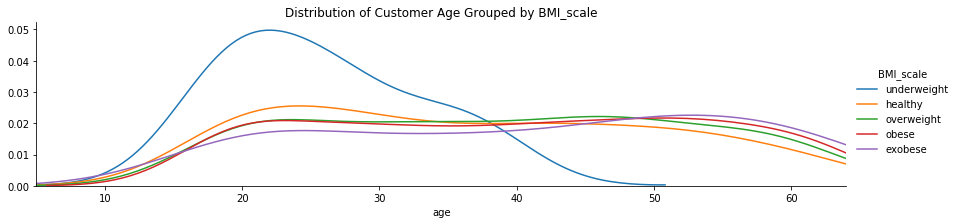

In [68]:
fig = sns.FacetGrid(ins, hue='BMI_scale',hue_order = ['underweight','healthy','overweight','obese','exobese'], aspect=4)
fig.map(sns.kdeplot,'age', shade=False)
oldest = ins['age'].max()
fig.set(xlim=(5,oldest))
fig.set(title='Distribution of Customer Age Grouped by BMI_scale')
fig.add_legend()

Figure 28: Kde plot showing the distribution of customer BMI_scale across the customer age range. We can see that the underweight population falls below the age of 50 years old, while all other categories are evenly distributed with a small increase in density of healthy patients between the ages of 18 and 32.

#### Distribution of customer ages by number of dependents

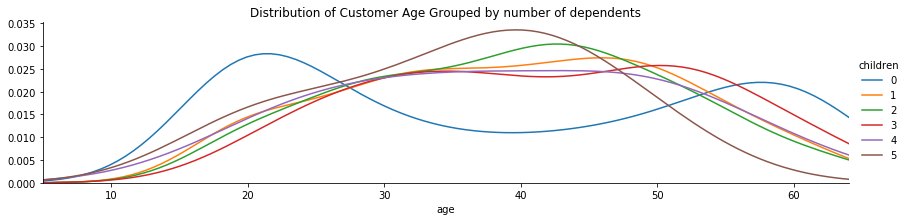

In [69]:
fig = sns.FacetGrid(ins, hue='children',hue_order = [0,1,2,3,4,5], aspect=4)
fig.map(sns.kdeplot,'age', shade=False)
oldest = ins['age'].max()
fig.set(xlim=(5,oldest))
fig.set(title='Distribution of Customer Age Grouped by number of dependents')
fig.add_legend()

Figure 29: Kde plot showing the distribution of customer dependents across the customer age range. The number of customers with 0 dependents are highes in the younger and older years as expected. However, we can see that customers with 1-4 dependenst are evely distributed upt the age of 65. Addtionally the highest density of customers with 5 dependetnst is found arourd the age of 40.

#### Distribution of customer ages by smoking prefernece

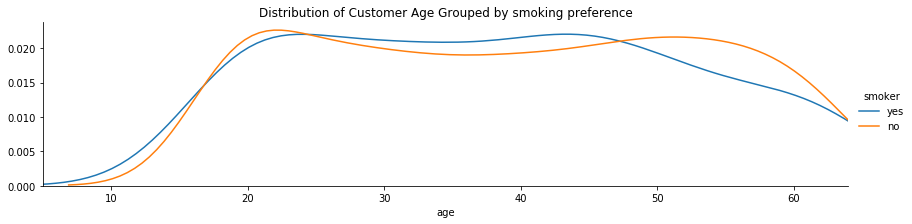

In [70]:
fig = sns.FacetGrid(ins, hue='smoker',hue_order = ['yes', 'no'], aspect=4)
fig.map(sns.kdeplot,'age', shade=False)
oldest = ins['age'].max()
fig.set(xlim=(5,oldest))
fig.set(title='Distribution of Customer Age Grouped by smoking preference')
fig.add_legend()

Figure 30: Kde plot showing the distribution of customer smoking preference across the customer age range. Smoking and non smoking customers are evenly distributed thru the age groups. However, the higest density of nonsmokers is found at around age 20 and over 50 years of age. 

#### Distribution of customer ages by region

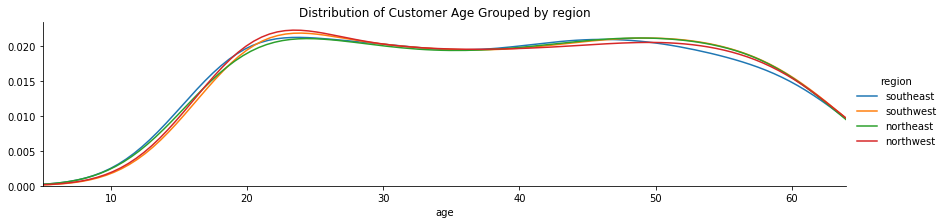

In [71]:
fig = sns.FacetGrid(ins, hue='region',hue_order = ['southeast', 'southwest','northeast','northwest'], aspect=4)
fig.map(sns.kdeplot,'age', shade=False)
oldest = ins['age'].max()
fig.set(xlim=(5,oldest))
fig.set(title='Distribution of Customer Age Grouped by region')
fig.add_legend()

Figure 31: Kde plot showing the distribution of customer's regions across the customer age range. We can see that the customer ages are evenly distributed thruout the four represented reions.

#### Distribution of customer ages by charges scale

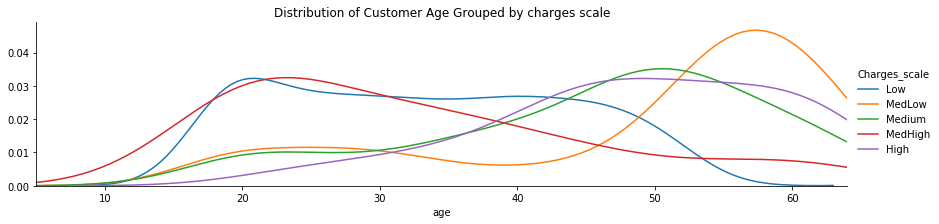

In [72]:
fig = sns.FacetGrid(ins, hue='Charges_scale', hue_order = ['Low', 'MedLow', 'Medium', 'MedHigh', 'High'], aspect=4)
fig.map(sns.kdeplot,'age', shade=False)
oldest = ins['age'].max()
fig.set(xlim=(5,oldest))
fig.set(title='Distribution of Customer Age Grouped by charges scale')
fig.add_legend()

Figure 32: Kde plot showing the distribution of customer charges across the customer age range

### Conver the scale to interger format and add columns for each new representation

In [73]:
#create a function to define patients sex by integer
def Y_X(SEX):
    sex = SEX
    if sex == 'male' :return 1
    if sex == 'female' :return 2
    

In [74]:
# add a column to ins describing 'SEX' with integers
ins['SEX']=ins['sex'].apply(Y_X)

In [75]:
ins.head()

,age,sex,bmi,children,smoker,region,charges,Charges_scale,Age_Group,BMI_scale,SEX
0,19,female,27.900,0,yes,southwest,16884.92400,MedLow,young,overweight,2
1,18,male,33.770,1,no,southeast,1725.55230,Low,young,obese,1
2,28,male,33.000,3,no,southeast,4449.46200,Low,young,obese,1
3,33,male,22.705,0,no,northwest,21984.47061,Medium,young,healthy,1
4,32,male,28.880,0,no,northwest,3866.85520,Low,young,overweight,1


Figure 32: Kde plot showing the distribution of customer charges across the customer age range. 

In [76]:
#create a function to define Charges_scale by integer
def L_ML_M_MH_H(Charges_scale2):
    Charges_scale = Charges_scale2
    if Charges_scale == 'Low' :return 1
    if Charges_scale == 'MedLow' :return 2
    if Charges_scale == 'Medium' : return 3
    if Charges_scale == 'MedHigh' : return 4
    if Charges_scale == 'High' : return 5 

In [77]:
# add a column to ins describing 'Charges_scale2' with integers
ins['Charges_scale2']=ins['Charges_scale'].apply(L_ML_M_MH_H)

In [78]:
ins.head()

,age,sex,bmi,children,smoker,region,charges,Charges_scale,Age_Group,BMI_scale,SEX,Charges_scale2
0,19,female,27.900,0,yes,southwest,16884.92400,MedLow,young,overweight,2,2
1,18,male,33.770,1,no,southeast,1725.55230,Low,young,obese,1,1
2,28,male,33.000,3,no,southeast,4449.46200,Low,young,obese,1,1
3,33,male,22.705,0,no,northwest,21984.47061,Medium,young,healthy,1,3
4,32,male,28.880,0,no,northwest,3866.85520,Low,young,overweight,1,1


In [79]:
#create a function to define BMI_scale by integer
def UW_H_OW_O_EO(BMI_scale2):
    BMI_scale = BMI_scale2
    if BMI_scale == 'underweight':return 1
    if BMI_scale == 'healthy':return 2
    if BMI_scale == 'overweight': return 3
    if BMI_scale == 'obese' :return 4
    if BMI_scale == 'exobese' :return 5 

In [80]:
# add a column to ins describing 'BMI_scale2' with integers
ins['BMI_scale2']=ins['BMI_scale'].apply(UW_H_OW_O_EO)

In [81]:
ins.head()

,age,sex,bmi,children,smoker,region,charges,Charges_scale,Age_Group,BMI_scale,SEX,Charges_scale2,BMI_scale2
0,19,female,27.900,0,yes,southwest,16884.92400,MedLow,young,overweight,2,2,3.0
1,18,male,33.770,1,no,southeast,1725.55230,Low,young,obese,1,1,4.0
2,28,male,33.000,3,no,southeast,4449.46200,Low,young,obese,1,1,4.0
3,33,male,22.705,0,no,northwest,21984.47061,Medium,young,healthy,1,3,2.0
4,32,male,28.880,0,no,northwest,3866.85520,Low,young,overweight,1,1,3.0


In [82]:
#create a function to define Age_Group by integer
def young_middle_older(Age_Group2):
    Age_Group = Age_Group2
    if Age_Group == 'young' :return 1
    if Age_Group == 'middle' :return 2
    if Age_Group == 'older' :return 3
    

In [83]:
ins['Age_Group2'] = ins['Age_Group'].apply(young_middle_older)

In [84]:
ins.head()

,age,sex,bmi,children,smoker,region,charges,Charges_scale,Age_Group,BMI_scale,SEX,Charges_scale2,BMI_scale2,Age_Group2
0,19,female,27.900,0,yes,southwest,16884.92400,MedLow,young,overweight,2,2,3.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,Low,young,obese,1,1,4.0,1.0
2,28,male,33.000,3,no,southeast,4449.46200,Low,young,obese,1,1,4.0,1.0
3,33,male,22.705,0,no,northwest,21984.47061,Medium,young,healthy,1,3,2.0,1.0
4,32,male,28.880,0,no,northwest,3866.85520,Low,young,overweight,1,1,3.0,1.0


In [85]:
#create a function to define region by integer
def se_sw_ne_nw(Region2):
    region = Region2
    if region == 'southeast' :return 1
    if region == 'southwest' :return 2
    if region == 'northeast' :return 3
    if region == 'northwest' :return 4 

In [86]:
ins['Region2'] = ins['region'].apply(se_sw_ne_nw)

In [87]:
ins.head()

,age,sex,bmi,children,smoker,region,charges,Charges_scale,Age_Group,BMI_scale,SEX,Charges_scale2,BMI_scale2,Age_Group2,Region2
0,19,female,27.900,0,yes,southwest,16884.92400,MedLow,young,overweight,2,2,3.0,1.0,2
1,18,male,33.770,1,no,southeast,1725.55230,Low,young,obese,1,1,4.0,1.0,1
2,28,male,33.000,3,no,southeast,4449.46200,Low,young,obese,1,1,4.0,1.0,1
3,33,male,22.705,0,no,northwest,21984.47061,Medium,young,healthy,1,3,2.0,1.0,4
4,32,male,28.880,0,no,northwest,3866.85520,Low,young,overweight,1,1,3.0,1.0,4


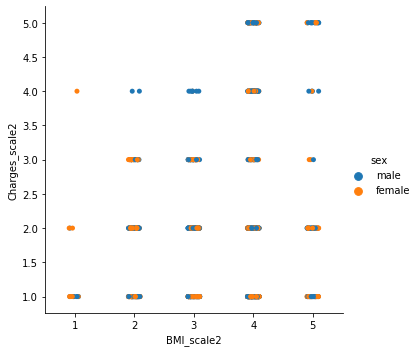

In [88]:
sns.catplot('BMI_scale2','Charges_scale2', hue='sex', data=ins, order=range(1,6),
           hue_order = ['male', 'female'])

Figure 33: categorical plot for the charges scale in integer form based on BMI and Gender.

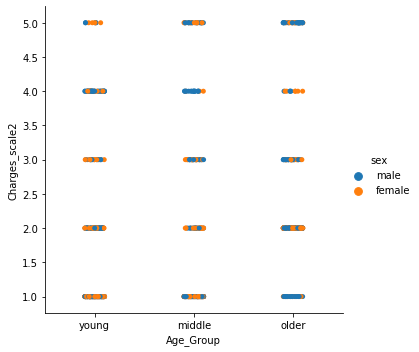

In [89]:
sns.catplot('Age_Group','Charges_scale2', hue='sex', data=ins, order=('young','middle','older'),
           hue_order = ['male', 'female'])

Figure 34: Categorical plot for the charges scale in integer form based on Age Group and Gender.

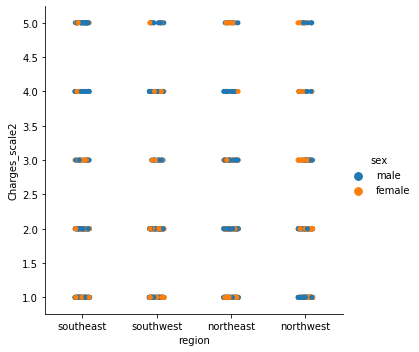

In [90]:
sns.catplot('region','Charges_scale2', hue='sex', data=ins, order=('southeast','southwest','northeast','northwest'),
           hue_order = ['male', 'female'])

Figure 35: categorical plot for the charges scale in integer form by on region and Gender.

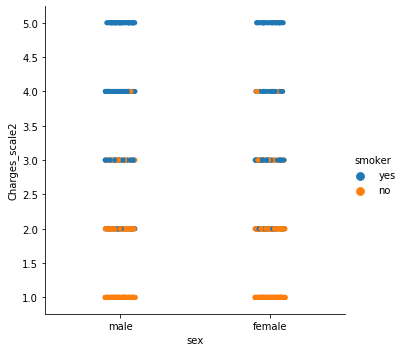

In [91]:
sns.catplot('sex','Charges_scale2', hue='smoker', data=ins, order=('male','female',),
           hue_order = ['yes', 'no'])

Figure 36: categorical plot for the charges scale in integer form gender and smoking preference.

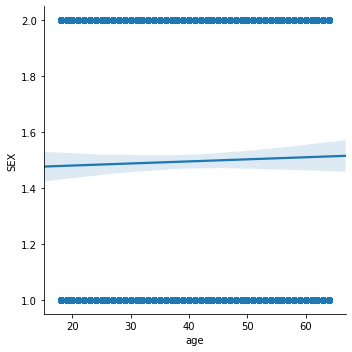

In [92]:
# linear plot of age vs sex
sns.lmplot('age', 'SEX', data=ins)

Figure 37: Linear Plot of age vs gender. we can that the genders are well destributed thru the age of our customer population. on the Y axis 1= male & 2 = female.

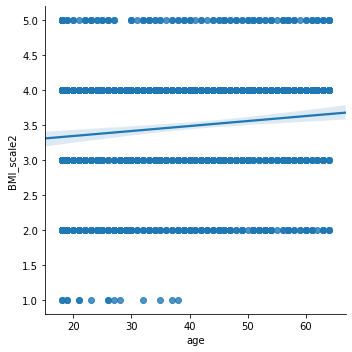

In [93]:
# linear plot of age vs BMI
sns.lmplot('age', 'BMI_scale2', data=ins)

Figure 38: Linear Plot of age vs BMI. we can that there is a trend with age. the older the patient the higher the patient rates on the BMI scale. 1= underweight, 2 = healthy, 3 = overweight, 4 = obese, 5 = extraobese. 

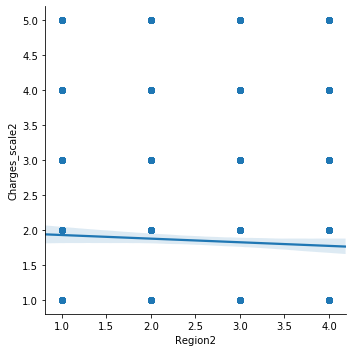

In [94]:
# linear plot of region vs charges
sns.lmplot('Region2', 'Charges_scale2', data=ins)

Figure 39:  Linear plot of the cutomer region and charges by scale. we can see that the average of charges per rigion is under 2 = MedLow level ($10K-20K), addtionally the highest average comes from region 1 which is the southeast and the lowest average is found in region 4 the northwest.

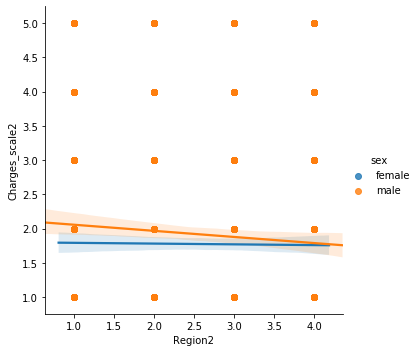

In [95]:
# linear plot of region vs charges seperated by gender
sns.lmplot('Region2', 'Charges_scale2', data=ins, hue = 'sex')

Figure 40: Linear plot of the cutomer region and charges by scale. we can see that the average of charges per region seperated by gender. charges_scale2: 1. Low, 2. MedLow, 3. Medium, 4. MedHigh, 5. High; Region2: 1. southeast, 2. southwest, 3. northeast, 4. northwest.

In [96]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Charges_scale', 'Age_Group', 'BMI_scale', 'SEX', 'Charges_scale2',
       'BMI_scale2', 'Age_Group2', 'Region2'],
      dtype='object')

In [97]:
# create csv file of modified data set 
ins.to_csv("ins_mod.csv", sep=',')